In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import gmaps

In [74]:
#pulling csv file
#reading csv file
nyc_df = pd.read_csv('Airbnb Data/AB_NYC_2019.csv')

#find the variable data types
nyc_df = nyc_df.dropna() #drop any null values
nyc_df.head()




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


# First Chart (Change after creation)

neighbourhood_group
Bronx             79.558857
Brooklyn         121.463289
Manhattan        180.071596
Queens            95.783683
Staten Island     89.964968
Name: price, dtype: float64


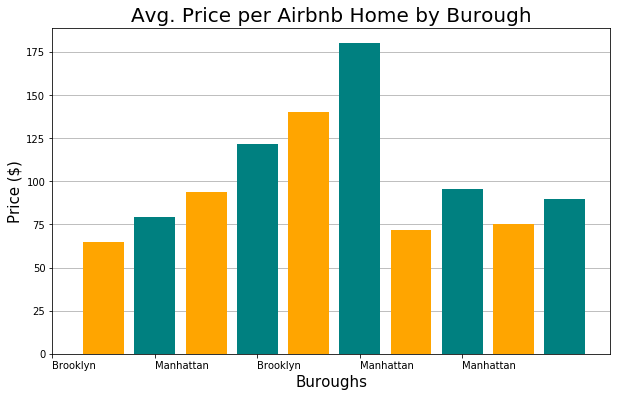

In [183]:
#plot average price in neighborhoods
n_type = nyc_df.groupby(['neighbourhood_group'])
neighbor_mean = pd.DataFrame(n_type['price'].mean())
n_name = nyc_df['neighbourhood_group'].unique()
neighbor_mean = neighbor_mean['price']
neighbor_med = pd.DataFrame(n_type['price'].median())
neighbor_med = neighbor_med['price']
x = np.arange(len(neighbor_mean))

plt.figure(figsize=(10,6))

plt.bar(x+1,neighbor_mean,width=.4,color=('teal'),zorder=3)
plt.bar(x+.5,neighbor_med,width=.4,color=('orange'),zorder=3)
#neighbor_mean.plot(kind="bar",figsize=(10,6),color=('orange','green','blue','teal'),align='center',
                  #legend=None,zorder=3)

#format chart
plt.title('Avg. Price per Airbnb Home by Burough',size=20)
plt.xlabel('Buroughs', size=15)
plt.ylabel('Price ($)', size=15)
plt.grid(axis='y',zorder=0)
plt.xticks(x,n_name,rotation='horizontal',ha='left')


#for x, y in range(len(neighbourhood)):

print(neighbor_mean)

Text(0.5, 1.0, 'Distribution of Prices in Various Buroughs')

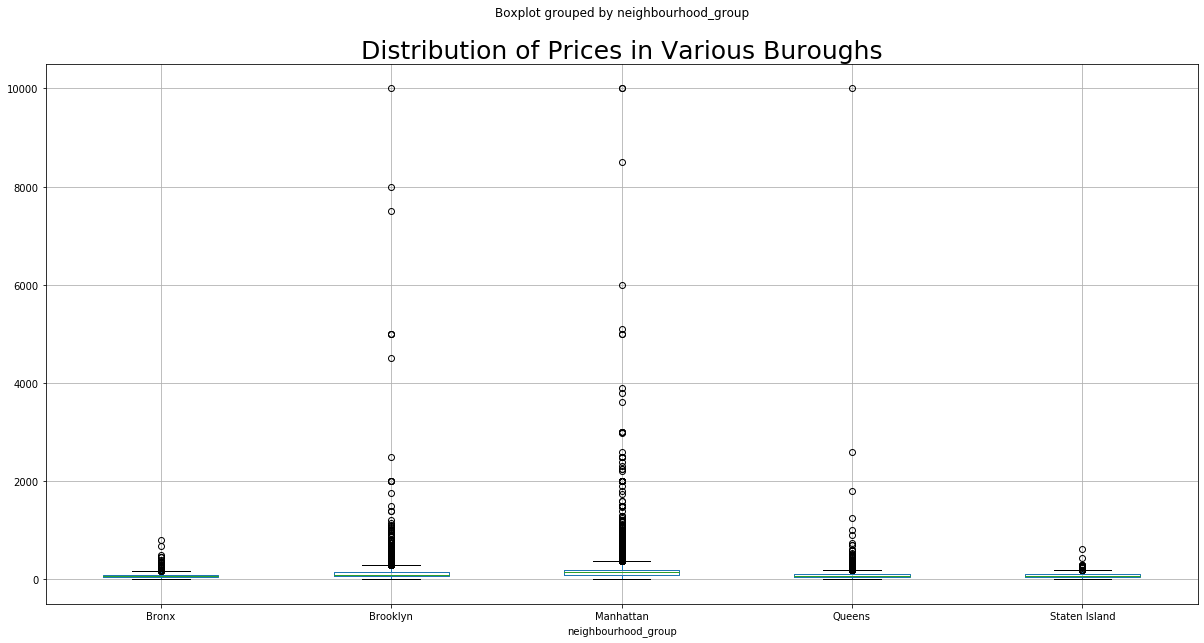

In [185]:
#Distribution of Buroughs
bur_group = nyc_df[['neighbourhood_group','price']]

bur_group.boxplot('price',by='neighbourhood_group',figsize=(20,10))
plt.title('Distribution of Prices in Various Buroughs',size=25)


In [187]:
#
Bronx_hood =  nyc_df[nyc_df["neighbourhood_group"] == "Bronx"]["price"]
Brooklyn_hood = nyc_df[nyc_df["neighbourhood_group"] == "Brooklyn"]["price"]
Manhaton_hood =nyc_df[nyc_df["neighbourhood_group"] == "Manhattan"]["price"]
Queens_hood= nyc_df[nyc_df["neighbourhood_group"] == "Queens"]["price"]
Staten_hood= nyc_df[nyc_df["neighbourhood_group"] == "Staten Island"]["price"]
stats.f_oneway(Bronx_hood, Brooklyn_hood, Manhaton_hood, Queens_hood, Staten_hood)

F_onewayResult(statistic=299.1170643325002, pvalue=7.558354126272287e-254)

In [111]:
#Find calculations for charts 
bur_group = nyc_df[['neighbourhood_group','price']]

manhattan = pd.DataFrame(nyc_df.loc[nyc_df['neighbourhood_group']=='Manhattan',:])

m_group = manhattan.groupby(['neighbourhood'])

nmean = pd.DataFrame(m_group['price'].mean())
nmean = nmean['price']
nmedian = pd.DataFrame(m_group['price'].median())
nmedian = nmedian['price']


(0, 500)

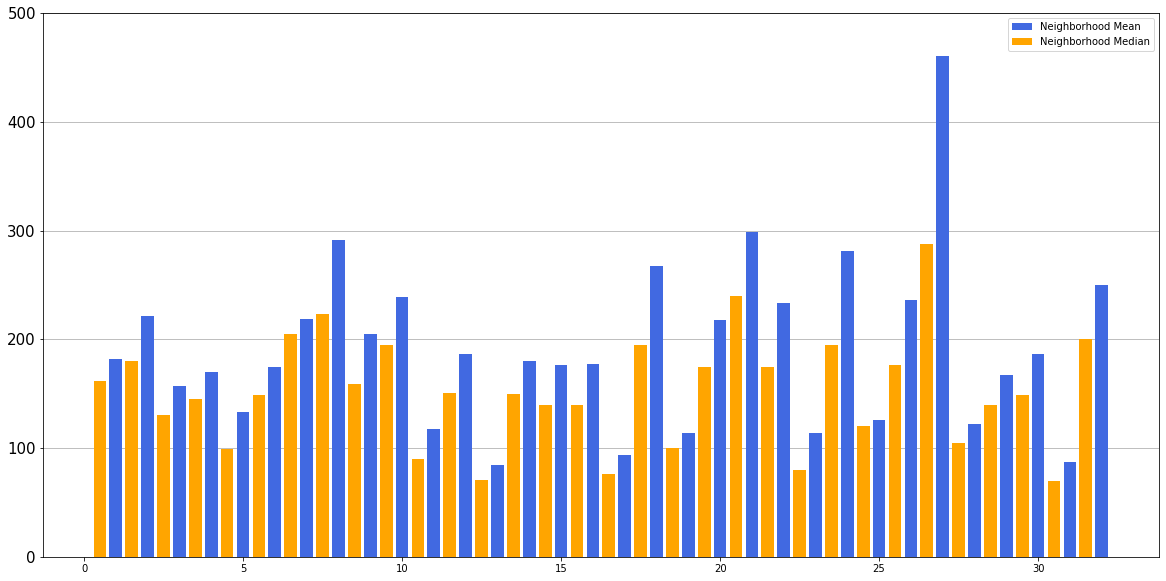

In [168]:
#Bar chart to portray the average of prices in each neighborhood in Manhattan
xpos= np.arange(len(nmean))



plt.figure(figsize=(20,10))
plt.bar(xpos+1,nmean,label='Neighborhood Mean',width=0.4,color='royalblue',zorder=3);
plt.bar(xpos+0.5,nmedian,label='Neighborhood Median',width=0.4,color='orange',zorder=3);
plt.legend()
plt.grid(axis='y')
plt.yticks(size=15)
plt.ylim(0,500)
#print(round(nmean,2))
#nmean.plot(kind='bar', figsize=(20,8),align='center')
#nmedian.plot(kind='bar', figsize=(20,8),align='center')

#plt.xticks(rotation=45)





                      price
room_type                  
Entire home/apt  196.315929
Private room      83.985272
Shared room       63.213948


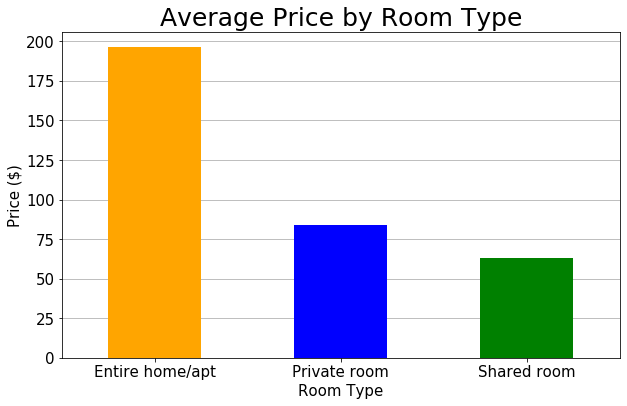

In [77]:
#Groupby Room Types
rm_type = nyc_df.groupby(['room_type'])
room_mean = pd.DataFrame(rm_type['price'].mean())
print(room_mean)

#plot bar chart
room_mean.plot(kind="bar",figsize=(10,6), color=('orange','blue','green'),align='center',
              legend=None,zorder=3)

#format charts
plt.title('Average Price by Room Type',size = 25)
plt.xlabel('Room Type',size=15)
plt.ylabel('Price ($)', size=15)
plt.yticks(size=15)
plt.xticks(rotation='horizontal',size=15)
plt.grid(axis='y',zorder=0)


Text(0.5, 1.0, 'Distribution of Prices Based on Room Types')

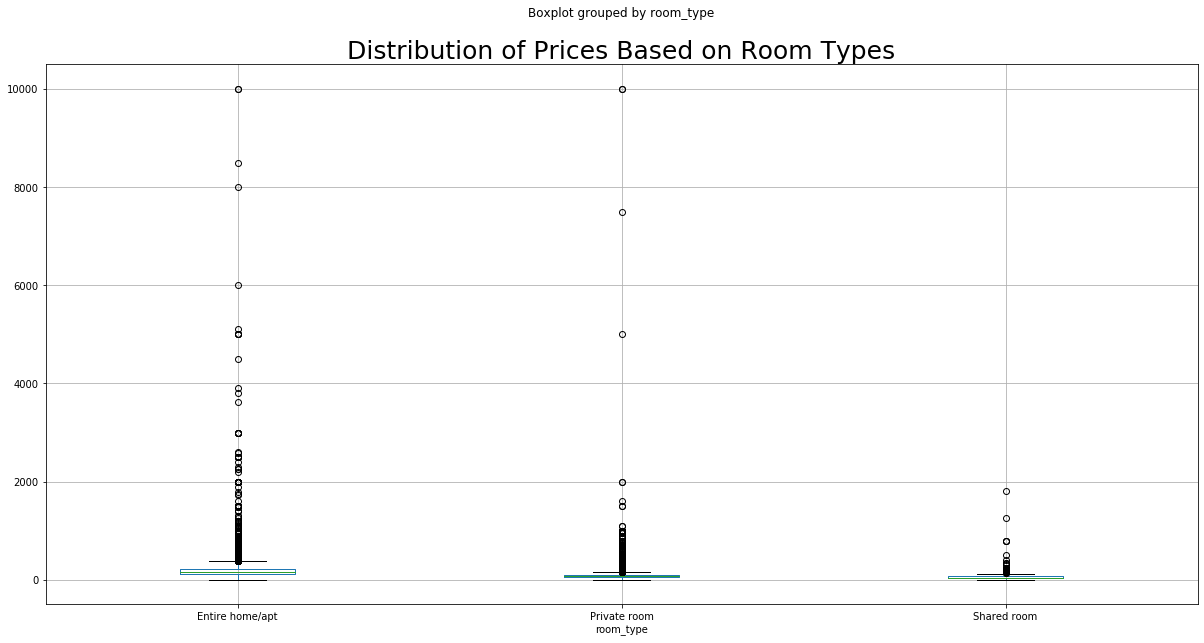

In [186]:
bur_group = nyc_df[['room_type','price']]

bur_group.boxplot('price',by='room_type',figsize=(20,10))
plt.title('Distribution of Prices Based on Room Types',size=25)
